# Onyx Data EDA & Python Analysis 

## 1- Data Loading & Initial Inspection 

In [119]:
import pandas as pd
df = pd.read_excel('Onyx Data.xlsx',sheet_name='Onyx Data')

In [120]:
df.shape

(10000, 25)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         10000 non-null  int64         
 1   Date                  10000 non-null  datetime64[ns]
 2   Time                  10000 non-null  object        
 3   CustomerID            10000 non-null  int64         
 4   Age                   10000 non-null  int64         
 5   Gender                10000 non-null  object        
 6   Location              10000 non-null  object        
 7   StoreID               4582 non-null   float64       
 8   OnlineOrderFlag       10000 non-null  bool          
 9   ProductID             10000 non-null  int64         
 10  ProductName           10000 non-null  object        
 11  Category              10000 non-null  object        
 12  Quantity              10000 non-null  int64         
 13  UnitPrice        

In [122]:
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,2020-12-24,07:27:59,441,27,Other,City_15,NaN,True,106,...,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,2022-11-18,14:36:39,340,43,Male,City_13,NaN,True,816,...,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,...,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,...,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,2020-12-13,04:38:08,344,26,Other,City_10,90.0,False,687,...,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [123]:
df.describe()

,TransactionID,Date,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00000,10000,10000.00000,10000.000000,4582.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5418.000000,10000.000000
mean,5000.50000,2021-05-31 23:03:41.760000256,251.93300,43.791700,50.920559,500.234800,3.010600,54.962118,165.426015,6.954545,3.004245,2.982500
min,1.00000,2018-11-01 00:00:00,1.00000,18.000000,1.000000,1.000000,1.000000,10.003242,10.017153,0.000000,1.000000,1.000000
25%,2500.75000,2019-12-02 00:00:00,127.00000,30.000000,26.000000,252.000000,2.000000,32.053314,71.897205,0.000000,2.000000,2.000000
50%,5000.50000,2021-11-01 00:00:00,254.00000,44.000000,51.000000,500.000000,3.000000,55.035737,136.291203,0.000000,3.000000,3.000000
75%,7500.25000,2022-11-30 00:00:00,379.00000,57.000000,76.000000,750.000000,4.000000,77.849652,241.049782,10.407700,4.000000,4.000000
max,10000.00000,2023-12-31 00:00:00,500.00000,70.000000,100.000000,1000.000000,5.000000,99.996579,499.982894,49.945866,5.000000,5.000000
std,2886.89568,NaN,145.00392,15.366585,28.864546,288.741317,1.404452,26.239370,116.107776,11.075408,1.419484,1.419153


## 2- Data Cleaning 

#### Removing Duplicates

In [131]:
df.drop_duplicates(inplace = True)

In [133]:
df.duplicated().sum() 

0

#### Handeling Missing Values 

In [136]:
df.isnull().sum()

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64

In [138]:
# As based on the data dictionary, the missing data in StoreID refer to the online purchases, while the missing ones
# in ShippingMethod and DeliveryTime where store bouaght items. 

In [140]:
df['StoreID'] = df['StoreID'].fillna("Online Order")

In [142]:
df['ShippingMethod'] = df['ShippingMethod'].fillna("In-store Purchase")

In [144]:
df['DeliveryTime'] = df['DeliveryTime'].fillna(0)

In [146]:
df['Event'] = df['Event'].fillna("None")

#### Dropping Unnecessary Columns

In [149]:
df.drop('Time', axis=1, inplace=True)

In [151]:
df.drop('ProductName', axis=1, inplace=True) #as both ProductName and Category appear to be the same

#### Converting Data Types

In [154]:
df['DeliveryTime'] = df['DeliveryTime'].astype(int)

#### Detecting Outliers in UnitPrice or Quantity

<Axes: xlabel='UnitPrice'>

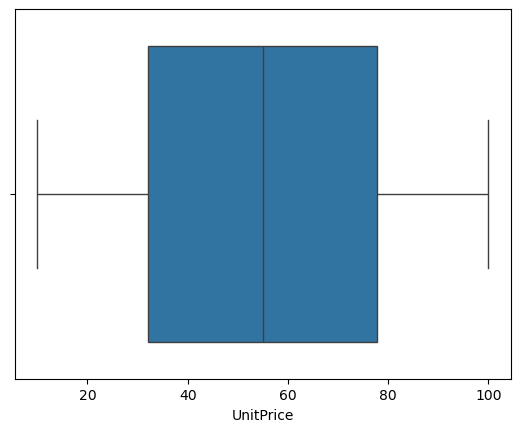

In [157]:
import seaborn as sns
sns.boxplot(x=df['UnitPrice'])  

<Axes: xlabel='Quantity'>

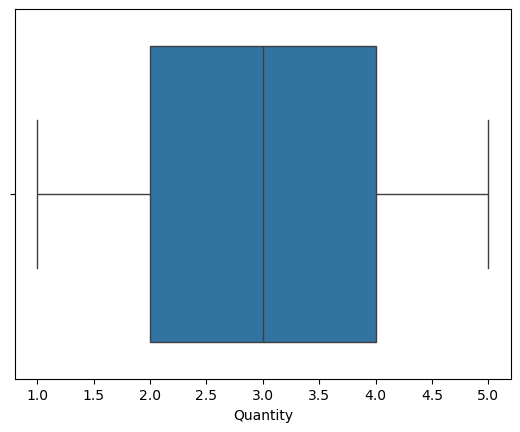

In [159]:
sns.boxplot(x=df['Quantity'])  

## 3- Analysis

#### Histogram for Customers by Age 

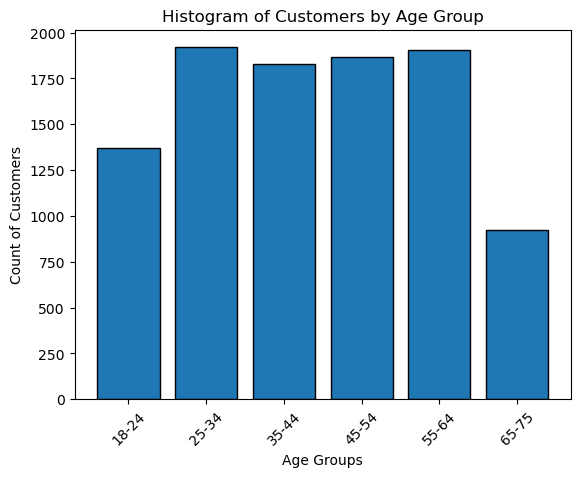

In [195]:
import matplotlib.pyplot as plt

bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-75']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['AgeGroup'].value_counts().sort_index()
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Count of Customers')
plt.title('Histogram of Customers by Age Group')
plt.xticks(rotation=45)
plt.show()

#### Pie Chart for Gender Distribution 

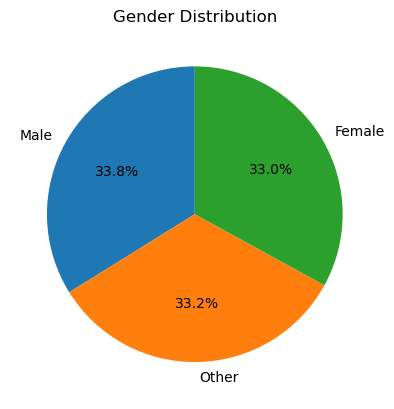

In [166]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

#### Average Unit Price by Product Category

In [169]:
df.groupby('Category')['TotalPrice'].mean() 

Category
Clothing       164.552123
Decorations    162.312319
Electronics    163.979678
Food           167.055211
Toys           169.225872
Name: TotalPrice, dtype: float64

#### Count Plot for Events

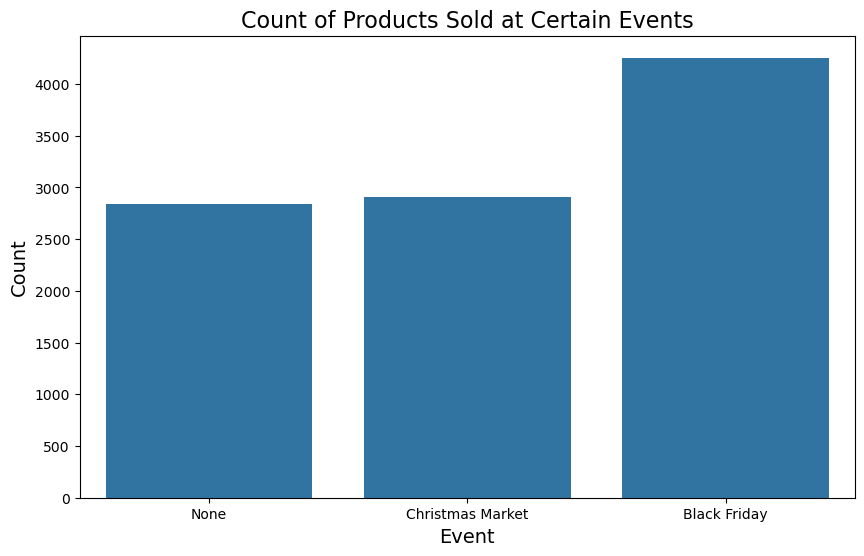

In [172]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Event', data=df)
plt.xlabel('Event', fontsize=14)
plt.ylabel('Count', fontsize=14)          
plt.title('Count of Products Sold at Certain Events', fontsize=16)
plt.show()

#### Relationship Between Discount Amount and Total Price

<Axes: xlabel='DiscountAmount', ylabel='TotalPrice'>

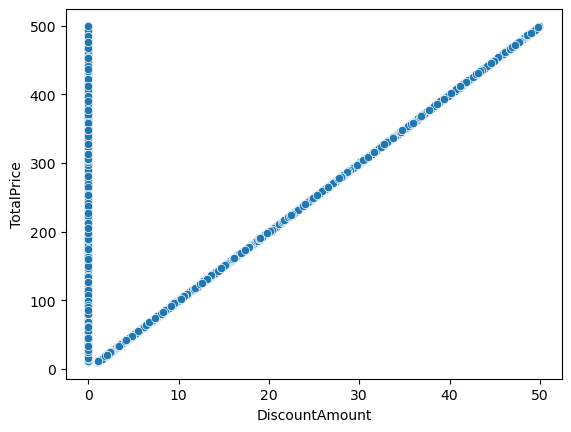

In [175]:
sns.scatterplot(x='DiscountAmount', y='TotalPrice', data=df)

#### Total Sales Over Time

<Axes: xlabel='Date'>

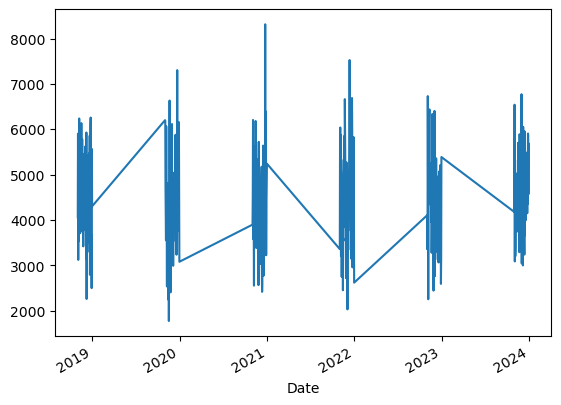

In [178]:
df.groupby('Date')['TotalPrice'].sum().plot()  # Plot sales over time

#### Return Rate Analysis 

<Axes: xlabel='Category'>

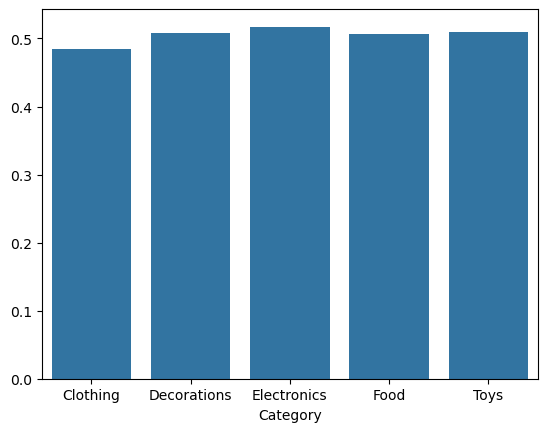

In [182]:
return_rate = df.groupby('Category')['ReturnFlag'].mean()  # Return rate by category
sns.barplot(x=return_rate.index, y=return_rate.values)

## 4- Saving the Cleaned Data

In [201]:
df.to_csv('onyxdata_cleaned.csv', index=False)